In [1]:
using Pkg
Pkg.activate("../")

using Revise
using ProbabilisticFSMs

 Activating environment at `~/GithubRepositories/ProbabilisticFSMs/Project.toml`


ArgumentError: ArgumentError: Package ProbabilisticFSMs [c2ae6250-d0a1-11ea-0991-234599ce5244] is required but does not seem to be installed:
 - Run `Pkg.instantiate()` to install all recorded dependencies.


In [6]:
using ProbabilisticFSMs

ArgumentError: ArgumentError: Package ProbabilisticFSMs [7212e43c-49b6-4278-a2e6-573e0ac5bb2d] is required but does not seem to be installed:
 - Run `Pkg.instantiate()` to install all recorded dependencies.


In [4]:
emissionsmap = Dict(
    "a" => 1,
    "b" => 2,
    "c" => 3,
    "d" => 4
)
sequence = ["a", "c", "b", "a"]
g1 = LinearGraph(sequence, emissionsmap)

UndefVarError: UndefVarError: LinearGraph not defined

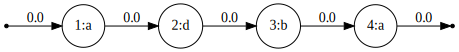

In [3]:
sequence = ["a", "d", "b", "a"]
g2 = LinearGraph(sequence, emissionsmap)

weightnormalize(g2)

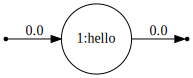

In [4]:
g3 = Graph()
s1 = addstate!(g3, State(1, 1, "hello"))
link!(initstate(g3), s1)
link!(s1, finalstate(g3))
g3

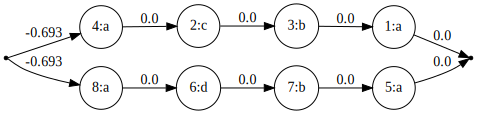

In [5]:
g = union(g1, g2)

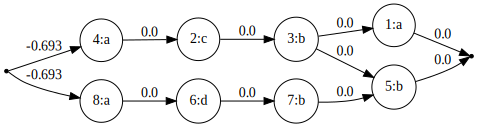

In [6]:
s = addstate!(g, State(5, emissionsmap["b"], "b"))
fs = finalstate(g)
sb = g.states[3]
g.states
link!(s, fs)
link!(sb, s)
g

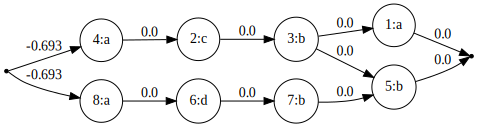

In [7]:
g

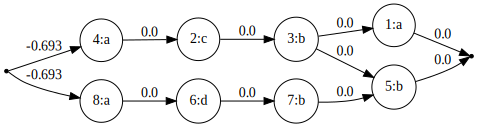

In [8]:
g

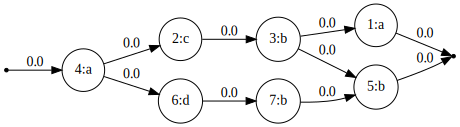

In [9]:
g |> minimize

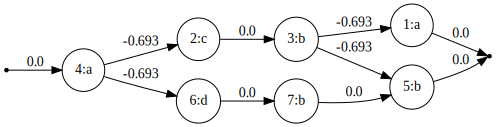

In [10]:
g = g |> minimize |> determinize |> weightnormalize

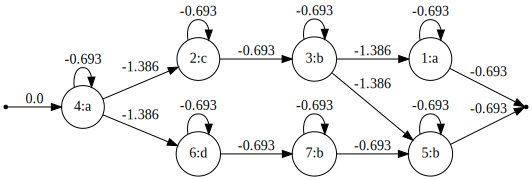

In [11]:
g = addselfloop(g) |> weightnormalize

In [217]:
for (sid, state) in g.states
    println("state $(state) : $(state.incoming)")
    println("---")
end

state State(id = initstateid, pdfindex = nothing, initstateid) : Link[]
---
state State(id = 4, pdfindex = 1, a) : Link[Link{Float64}(State(id = initstateid, pdfindex = nothing, initstateid), 0.0), Link{Float64}(State(id = 4, pdfindex = 1, a), -0.6931471805599454)]
---
state State(id = 7, pdfindex = 2, b) : Link[Link{Float64}(State(id = 7, pdfindex = 2, b), -0.6931471805599453), Link{Float64}(State(id = 2, pdfindex = 3, c), -0.6931471805599453), Link{Float64}(State(id = 6, pdfindex = 4, d), -0.6931471805599453)]
---
state State(id = 2, pdfindex = 3, c) : Link[Link{Float64}(State(id = 4, pdfindex = 1, a), -1.3862943611198906), Link{Float64}(State(id = 2, pdfindex = 3, c), -0.6931471805599453)]
---
state State(id = finalstateid, pdfindex = nothing, finalstateid) : Link[Link{Float64}(State(id = 5, pdfindex = 1, a), -0.6931471805599453)]
---
state State(id = 5, pdfindex = 1, a) : Link[Link{Float64}(State(id = 7, pdfindex = 2, b), -0.6931471805599453), Link{Float64}(State(id = 5, pdfindex =

In [14]:
D,N = 4,400 # number of distributions times number of frames
v = randn(N, 1) .- 6 
llh = repeat(v', D)

4×400 Array{Float64,2}:
 -7.23752  -5.44423  -5.76237  -4.26329  …  -6.37517  -6.36586  -4.52336
 -7.23752  -5.44423  -5.76237  -4.26329     -6.37517  -6.36586  -4.52336
 -7.23752  -5.44423  -5.76237  -4.26329     -6.37517  -6.36586  -4.52336
 -7.23752  -5.44423  -5.76237  -4.26329     -6.37517  -6.36586  -4.52336

In [25]:
llh = ones(4,5)

4×5 Array{Float64,2}:
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0

In [23]:
llh[:,1:2] .= [1, 0.5, 0, 0]
llh[:,3:4] .= [0.5, 1, 0.5, 0]
llh[:,5:5] .= [0, 0.5, 1, 0.5]
llh

4×5 Array{Float64,2}:
 1.0  1.0  0.5  0.5  0.0
 0.5  0.5  1.0  1.0  0.5
 0.0  0.0  0.5  0.5  1.0
 0.0  0.0  0.0  0.0  0.5

In [15]:
emissionsmap

Dict{String,Int64} with 4 entries:
  "c" => 3
  "b" => 2
  "a" => 1
  "d" => 4

In [47]:
s = g.states[2]
display(s.incoming)
display(s.outgoing)

2-element Array{Link,1}:
 Link{Float64}(State(id = 2, pdfindex = 3, c), -0.6931471805599453)
 Link{Float64}(State(id = 1, pdfindex = 1, a), -0.6931471805599453)

2-element Array{Link,1}:
 Link{Float64}(State(id = 2, pdfindex = 3, c), -0.6931471805599453)
 Link{Float64}(State(id = 3, pdfindex = 2, b), -0.6931471805599453)

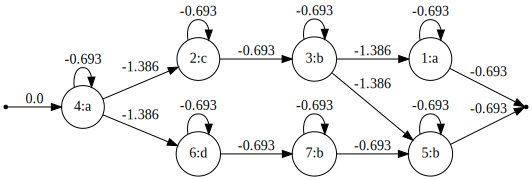

In [26]:
g

In [28]:
α = αrecursion(g, llh; pruning=nopruning) # the lower the more pruning 
α

[n = 1]  	a	4:a = 1.000  
[n = 2]  	a	4:a = 1.307  	2:c = 0.614  	6:d = 0.614  
[n = 3]  	c	4:a = 1.614  	3:b = 0.921  	7:b = 0.921  	2:c = 2.234  	6:d = 2.234  
[n = 4]  	c	1:a = 0.534  	4:a = 1.921  	3:b = 3.089  	7:b = 3.089  	5:b = 2.086  	2:c = 3.635  	6:d = 3.635  
[n = 5]  	b	1:a = 3.759  	4:a = 2.227  	3:b = 4.888  	7:b = 4.888  	5:b = 5.310  	2:c = 4.974  	6:d = 4.974  


In [13]:
β = βrecursion(g, llh; pruning=nopruning) # the lower the more pruning 
β

[n = 1]  	c	1:a = 0.228  	4:a = -1.466  	3:b = 0.558  	5:b = -0.466  	2:c = 0.727  
[n = 2]  	b	1:a = -0.992  	4:a = -1.773  	3:b = 0.469  	5:b = -0.273  	2:c = 0.408  
[n = 3]  	b	4:a = -1.579  	3:b = -0.183  	5:b = -0.579  	2:c = -0.799  
[n = 4]  	b	4:a = -1.386  	3:b = -1.105  	5:b = -0.886  
[n = 5]  	b	4:a = -0.693  	5:b = -0.693  


In [14]:
lnαβ, tll = αβrecursion(g, llh) # the lower the more pruning 
display(tll)
lnαβ

4.798578778287657

Same

[n = 1]  	a	1:a = 1.228  
[n = 2]  	c	1:a = 0.315  	2:c = 0.715  
[n = 3]  	c	3:b = 0.431  	2:c = 1.017  
[n = 4]  	b	4:a = -1.659  	3:b = 2.122  	5:b = -0.659  
[n = 5]  	b	4:a = 1.206  	5:b = 2.206  


State[State(id = 5, pdfindex = 1, a)]
[2.4496921953675406]
-----
State[State(id = 5, pdfindex = 1, a), State(id = 7, pdfindex = 2, b)]
[0.6804271107052051, 2.2143455711413766]
-----
State[State(id = 6, pdfindex = 4, d), State(id = 2, pdfindex = 3, c), State(id = 7, pdfindex = 2, b)]
[1.065389135159319, -2.4302709607893522, -1.709925938893071]
-----
State[State(id = 6, pdfindex = 4, d), State(id = 8, pdfindex = 1, a)]
[1.1020871927699054, -4.924617799721492]
-----
State[State(id = 6, pdfindex = 4, d), State(id = 8, pdfindex = 1, a)]
[0.08948705438494042, -4.1541803992854796]
-----
State[State(id = 6, pdfindex = 4, d), State(id = 8, pdfindex = 1, a)]
[-2.103903668577119, -0.5717629519612493]
-----
State[State(id = 8, pdfindex = 1, a)]
[-0.5717629519612493]
-----


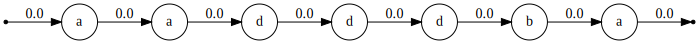

In [18]:
path = viterbi(g, llh)